In [1]:
import os
from pathlib import Path
import random
import sys

sys.path.append("../")

import matplotlib.pyplot as plt
from leonardo.processing import get_pipeline, load_image, get_config

config = get_config()
%load_ext autoreload
%autoreload 2

In [2]:
prompt = "Futuristic style, trending on artstation"
images_folder = Path("../data/images/")
output_folder = Path("../data/output/")

width = 128
strength = 0.2
guidance_scale = 1.5

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

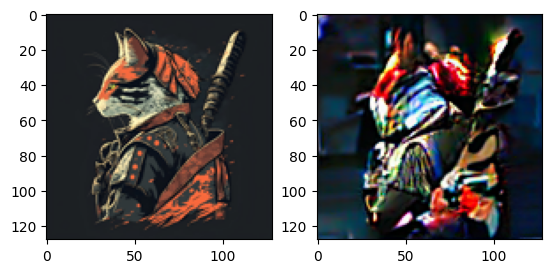

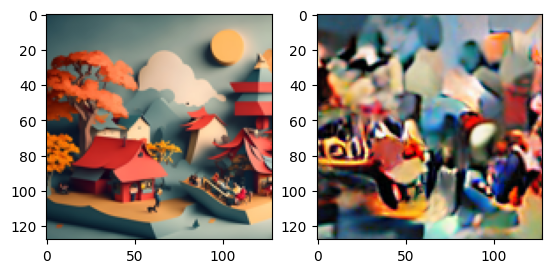

In [6]:
images_files = os.listdir(images_folder)

for file_name in images_files[:2]:
    # random pipeline
    model = random.choice(config['models'])
    pipe = get_pipeline(model)
    
    # load image
    image = load_image(image_path=images_folder / file_name, width=width)
    
    # perform processing
    output_image = pipe(prompt=prompt, image=image, strength=strength, guidance_scale=guidance_scale).images[0]
    
    # show
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(image)
    ax[1].imshow(output_image)
    
    # store result
    output_image.save(output_folder / file_name)